# Trajectory inference for hematopoiesis in mouse

Reconstructing myeloid and erythroid differentiation for data of [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import utils as ut


In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=100, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

In [3]:
data_path= "saved/adata/h5ad/GSE1108942021-05-12-11-45-06.h5ad"
results_file = data_path+'.trajectory.h5ad'

In [4]:
adata = sc.read_h5ad(filename=data_path)
sc.settings.set_figure_params(dpi=150, frameon=False, figsize=(3.5, 3.5), facecolor='white')  # low dpi (dots per inch) yields small inline figures

In [5]:
adata

AnnData object with n_obs × n_vars = 1419 × 6644
    obs: 'Plate#', 'Well position', 'Sample name', 'Index-Sort condition', 'Well index', 'sensitive', 'sensitivity', 'Resistant_score', 'Sensitive_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds', '0_score', '1_score', 'sens_truth', 'leiden_trans', 'leiden_Pret', 'dpt_pseudotime'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Pret', 'Trans', 'diffmap_evals', 'difftrans', 'draw_graph', 'hvg', 'iroot', 'leiden', 'leiden_Pret_colors', 'leiden_colors', 'leiden_origin_colors', 'leiden_sizes', 'leiden_trans_colors', 'leiden_trans_sizes', 'neighbors', 'paga', 'pca', 

In [6]:
#adata.obs.loc[adata.obs['cluster']=="Holiday","sensitivity"]='Resistant'
#adata = ut.de_score(adata=adata,clustername="sensitivity",pval=0.05,n=50)


In [11]:
adata.obsm["X_umap"] = adata.obsm["X_umap_origin"]

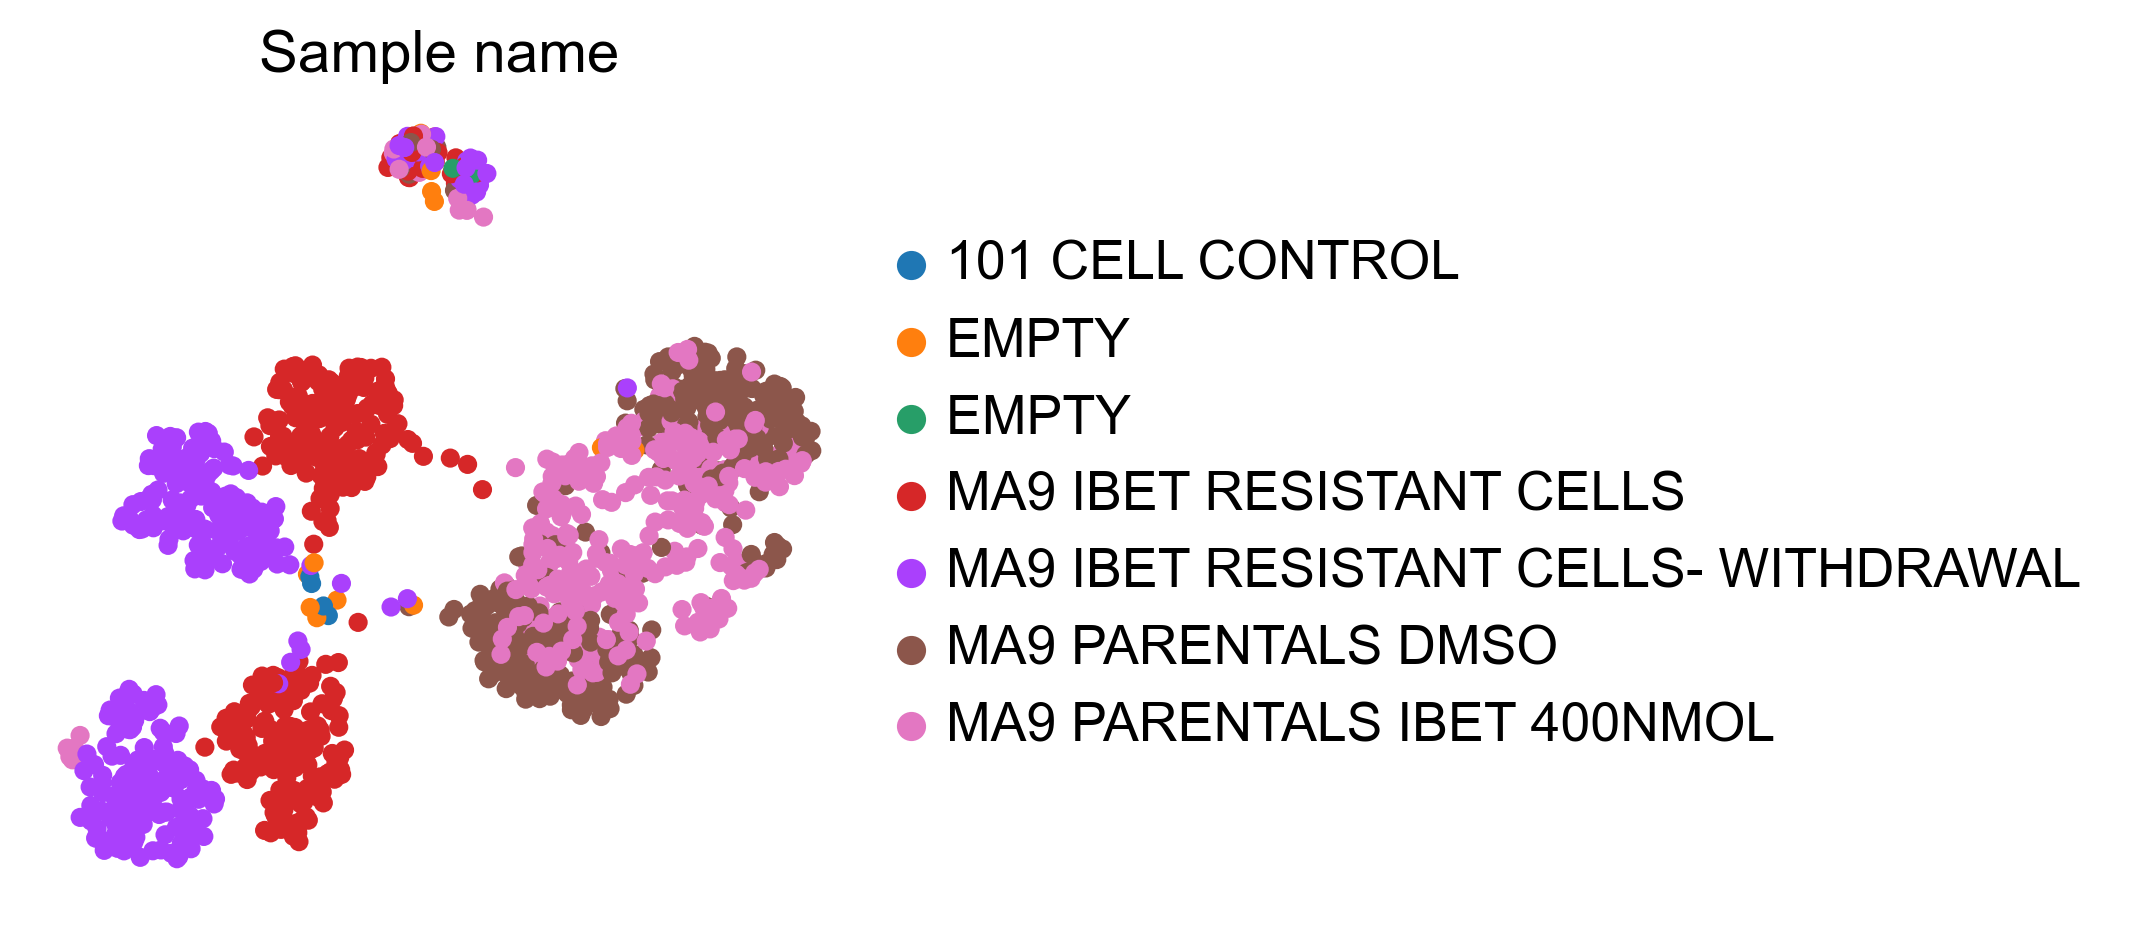

In [13]:
sc.pl.umap(adata,color='Sample name')

In [ ]:
sc.pl.umap(adata,color='Sample name')

In [8]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Resistant_score,Sensitive_score,n_genes,...,sens_label_pret,sens_preds,sens_label,rest_preds,0_score,1_score,sens_truth,leiden_trans,leiden_Pret,dpt_pseudotime
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,14.205806,-2.726364,7132,...,0,0.066740,0,0.935917,0.822543,0.256950,Resistant,4,1,0.898686
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,10.421614,-2.200808,6815,...,0,0.057485,0,0.944954,0.663072,0.327512,Resistant,4,1,0.907632
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,5.788548,-1.273636,4951,...,0,0.092928,0,0.913302,0.603386,0.468722,Resistant,4,1,0.817644
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,16.025484,-3.492323,7615,...,0,0.029891,0,0.971909,0.744076,0.159847,Resistant,3,1,0.833294
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,13.070160,-2.236667,6688,...,0,0.046924,0,0.955028,0.862696,0.221610,Resistant,3,1,0.881759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P18,RPI7,P18,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,ACGTGTGT,0,Resistant,8.079032,-1.348788,5421,...,0,0.020181,0,0.981156,0.709208,0.168304,Resistant,1,1,0.877343
RPI7_P19,RPI7,P19,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,TCAGCGTA,0,Resistant,8.462097,-1.234040,5293,...,0,0.009340,0,0.991229,0.906673,0.305216,Resistant,1,1,0.902509
RPI7_P20,RPI7,P20,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,AGAAGAGG,0,Resistant,5.184032,-0.823939,4101,...,0,0.032298,0,0.970467,0.808118,0.388211,Resistant,3,1,0.603219
RPI7_P21,RPI7,P21,EMPTY,EMPTY,TATCCGGA,1,Sensitive,1.591129,-0.295859,2012,...,1,0.523960,1,0.458442,1.147589,0.145037,Sensitive,0,2,0.538515


In [8]:
#adata = ut.de_score(adata=adata,clustername="sensitivity",pval=0.05,n=50)


Let us work with a higher precision than the default 'float32' to ensure _exactly_ the same results across different computational platforms.

In [9]:
adata.X = adata.X.astype('float64')  # this is not required and results will be comparable without it

## Preprocessing and Visualization

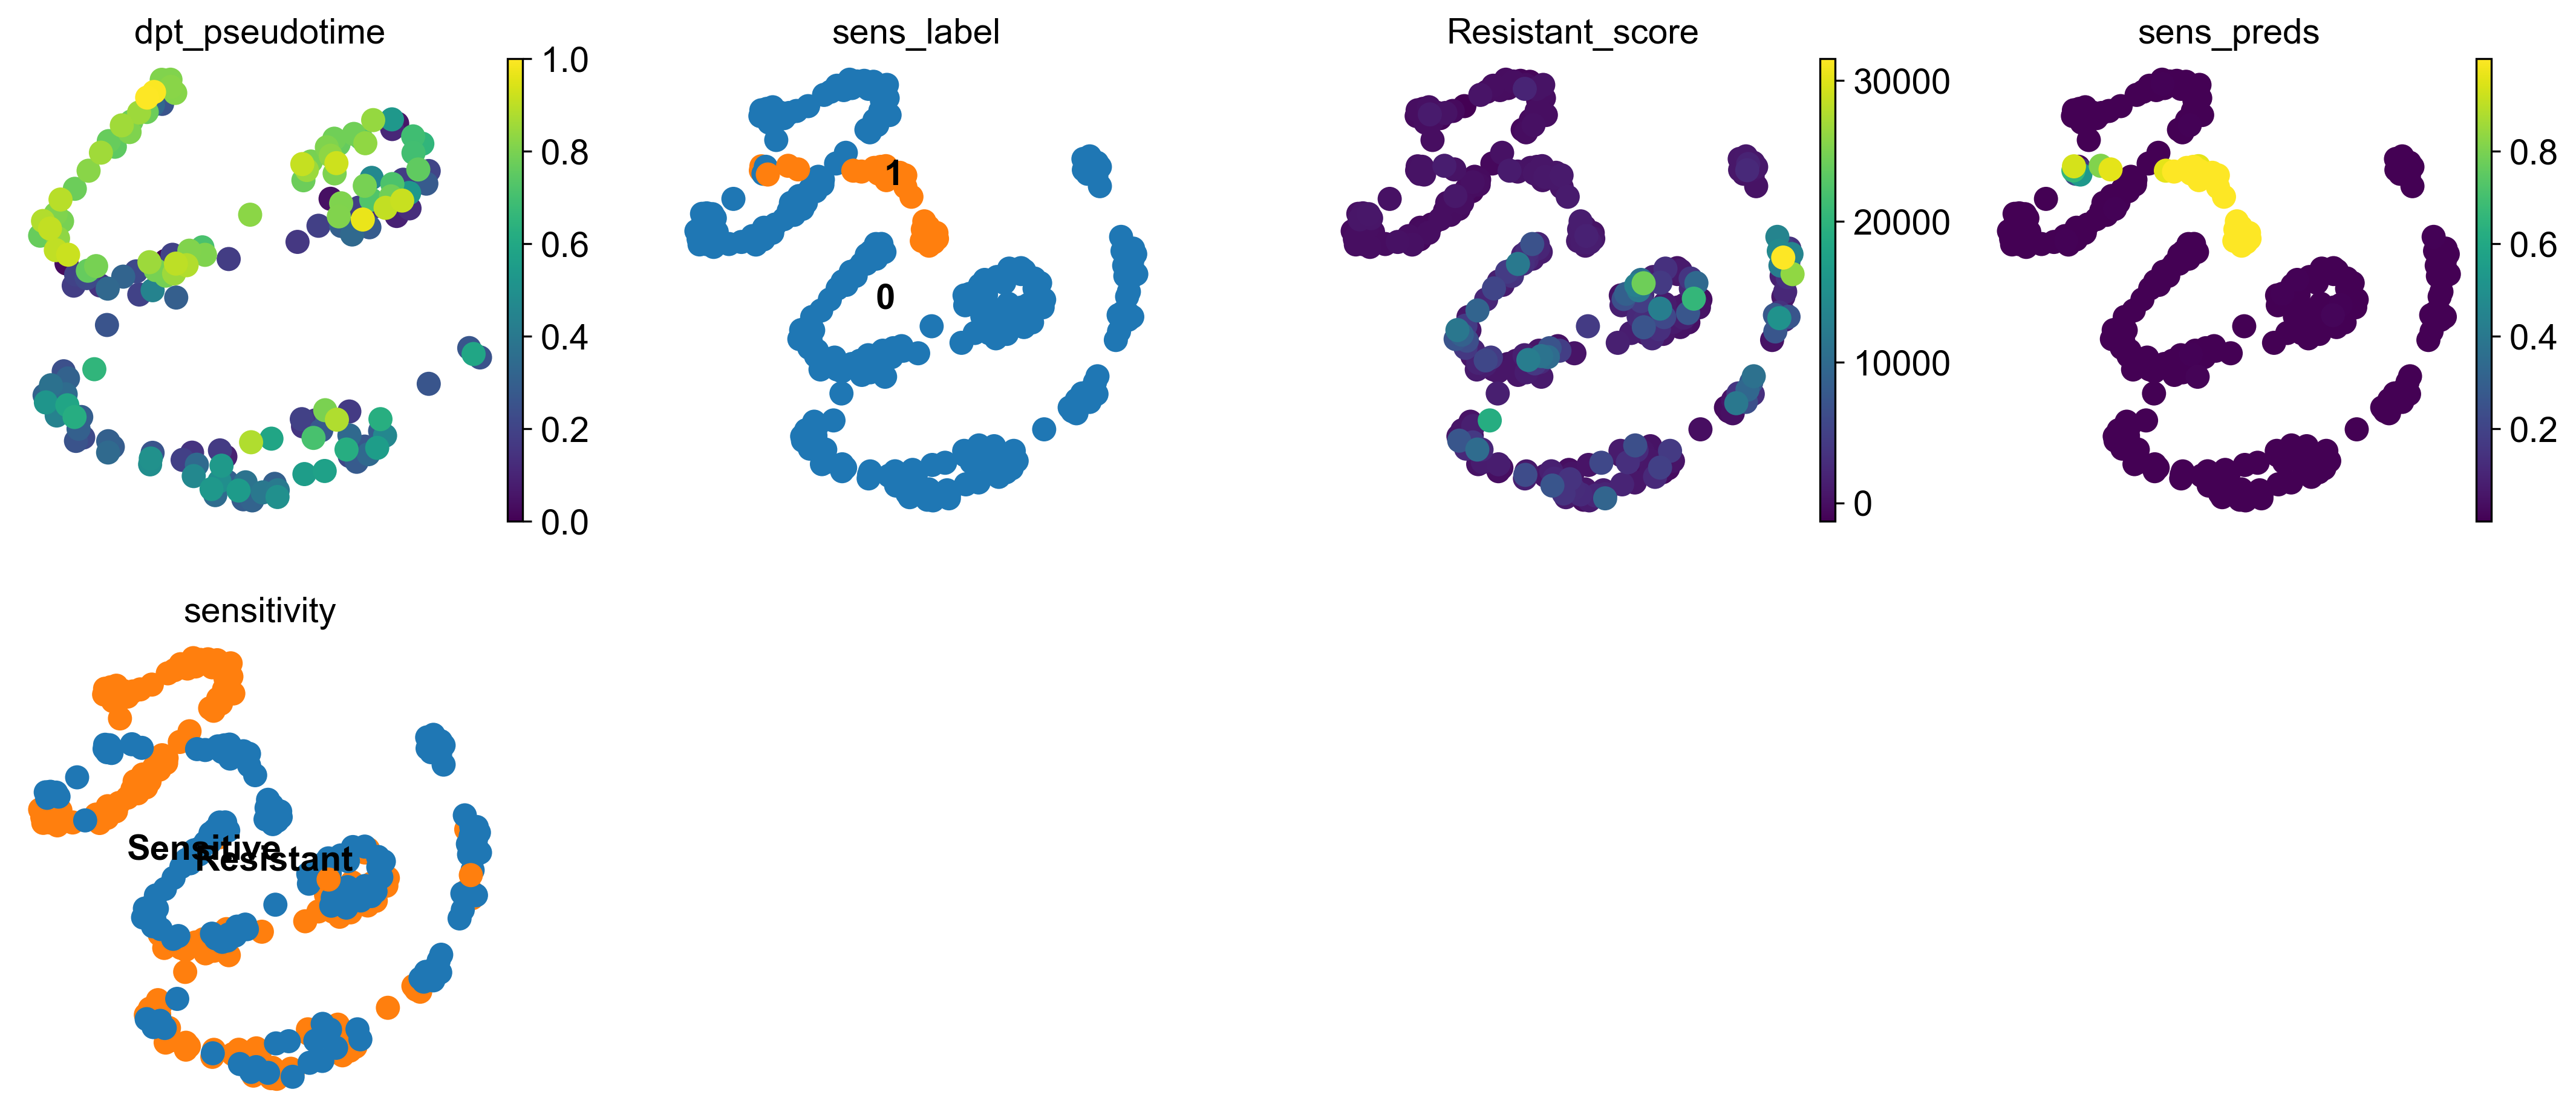

In [10]:
sc.pl.draw_graph(adata, color=[ 'dpt_pseudotime','sens_label','Resistant_score','sens_preds','sensitivity'], legend_loc='on data')

Apply a simple [preprocessing recipe](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html).

In [11]:
#sc.tl.pca(adata, svd_solver='arpack')

In [12]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20


D:\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:01)


In [13]:
# adata=adata[adata.obs['sensitivity'] !="EMPTY"]
# adata=adata[adata.obs['sensitivity'] !="EMPTY "]
# adata=adata[adata.obs['sensitivity'] !="parental"]

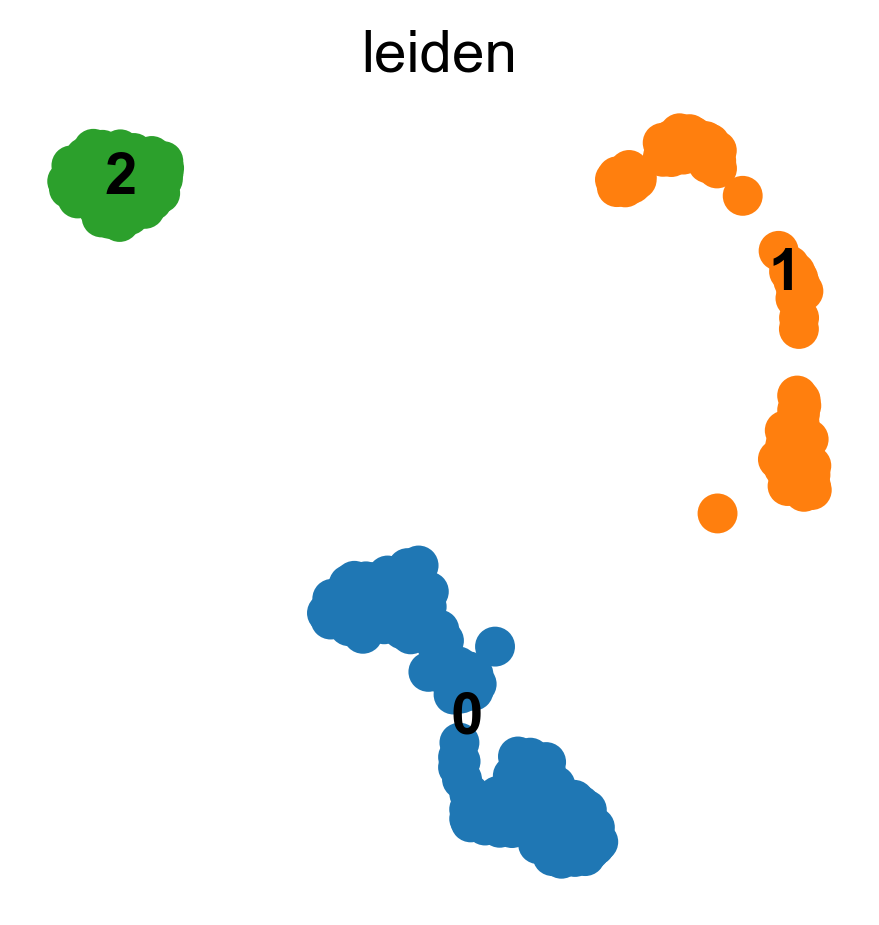

In [14]:
sc.pl.draw_graph(adata, color=['leiden'], legend_loc='on data')

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


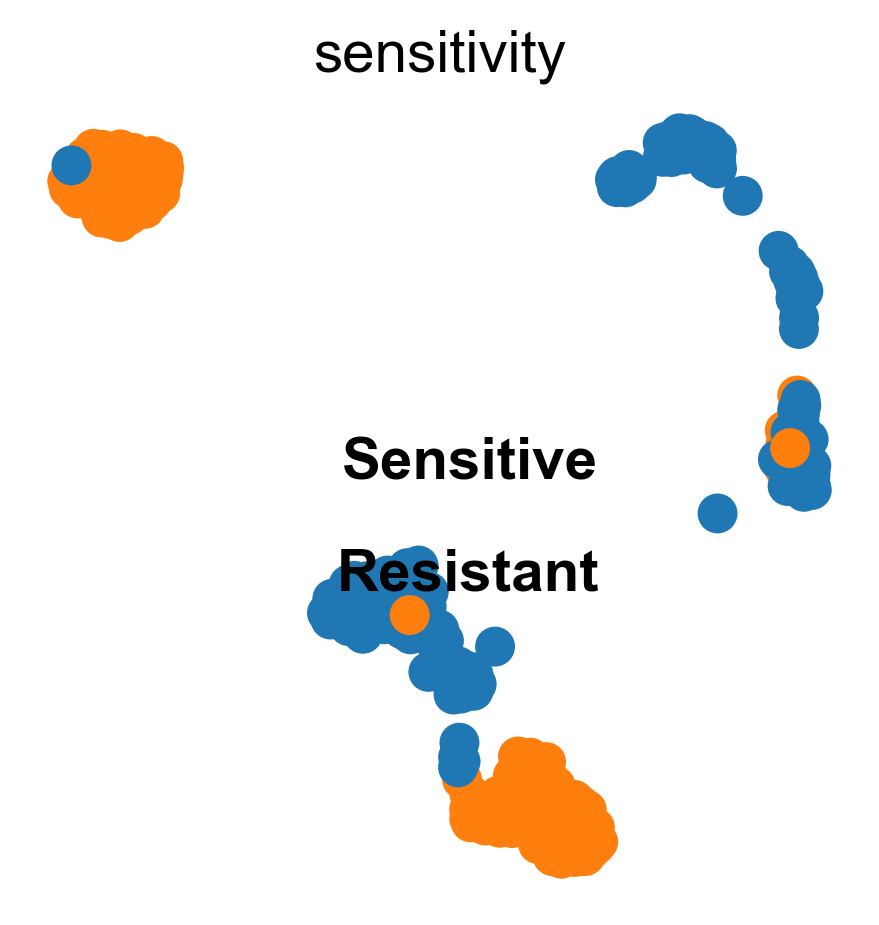

In [15]:
sc.tl.leiden(adata,resolution=0.04)
sc.pl.draw_graph(adata, color='sensitivity', legend_loc='on data')

This looks pretty messy.

## Optional: Denoising the graph

To denoise the graph, we represent it in diffusion map space (and not in PCA space). Computing distances within a few diffusion components amounts to denoising the graph - we just take a few of the first spectral components. It's very similar to denoising a data matrix using PCA. The approach has been used in a couple of papers, see e.g. [Schiebinger et al. (2017)](https://doi.org/10.1101/191056) or [Tabaka et al. (2018)](https://doi.org/10.1101/512582). It's also related to the principles behind MAGIC [Dijk et al. (2018)](https://doi.org/10.1016/j.cell.2018.05.061).

<div class="alert alert-info">

**Note**
    
This is *not* a necessary step, neither for PAGA, nor clustering, nor pseudotime estimation. You might just as well go ahead with a non-denoised graph. In many situations (also here), this will give you very decent results.
    
</div>  

In [16]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_diffmap')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.99832326 0.99073637 0.9815497  0.96358997
     0.9388983  0.93457377 0.87190914 0.86868286 0.85521007 0.85481477
     0.8304105  0.8051447  0.7997679 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [17]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:01)


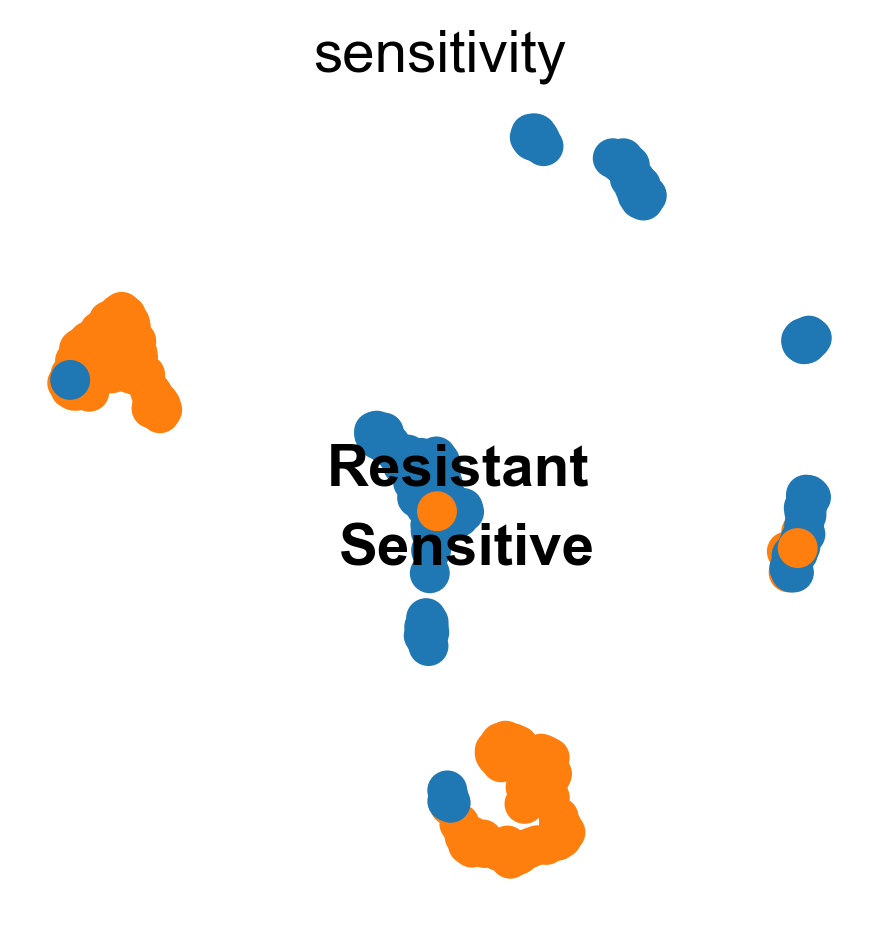

In [18]:
sc.pl.draw_graph(adata, color='sensitivity', legend_loc='on data')

This still looks messy, but in a different way: a lot of the branches are overplotted.

## Clustering and PAGA

<div class="alert alert-info">

**Note**

Note that today, we'd use `sc.tl.leiden` - here, we use `sc.tl.louvain` the sake of reproducing the paper results.
    
</div>  

In [19]:
#sc.tl.louvain(adata, resolution=1.0)

For simple, coarse-grained visualization, compute the PAGA graph, a coarse-grained and simplified (abstracted) graph. Non-significant edges in the coarse- grained graph are thresholded away.

In [20]:
sc.tl.paga(adata, groups='sensitivity')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


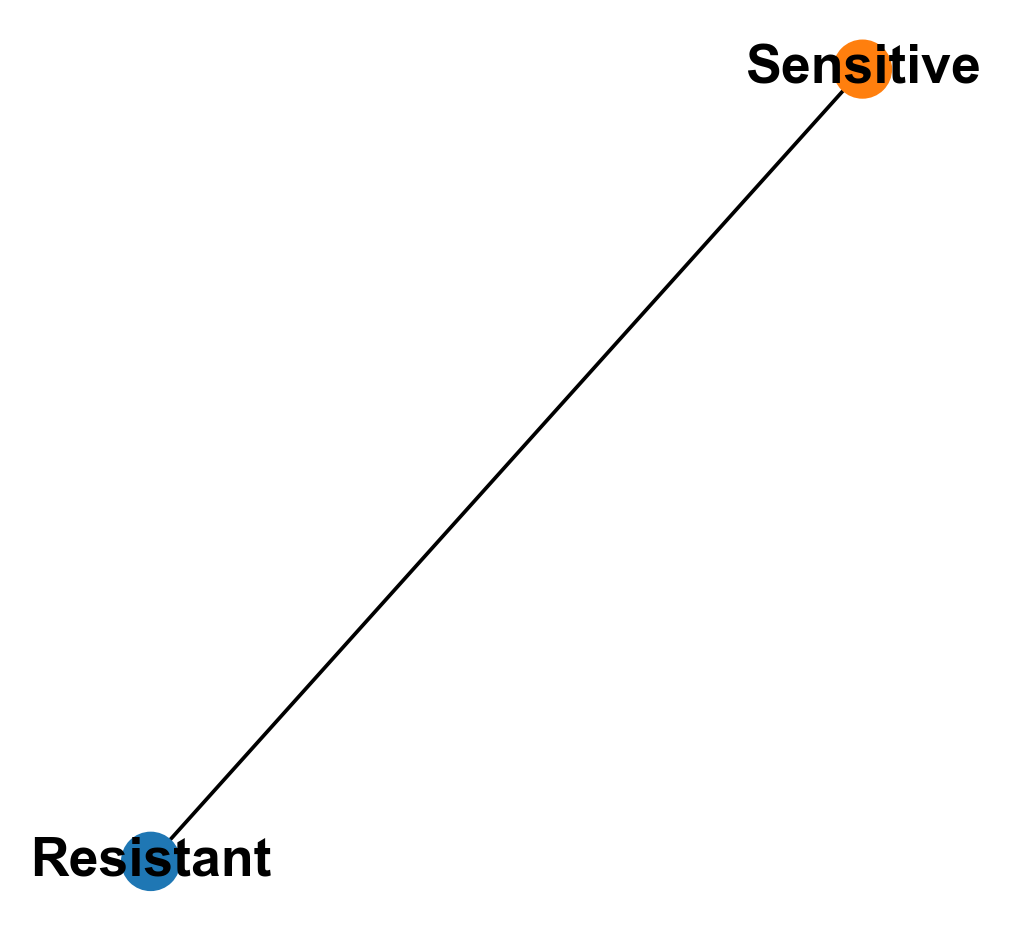

In [21]:
sc.pl.paga(adata)

--> added 'pos', the PAGA positions (adata.uns['paga'])


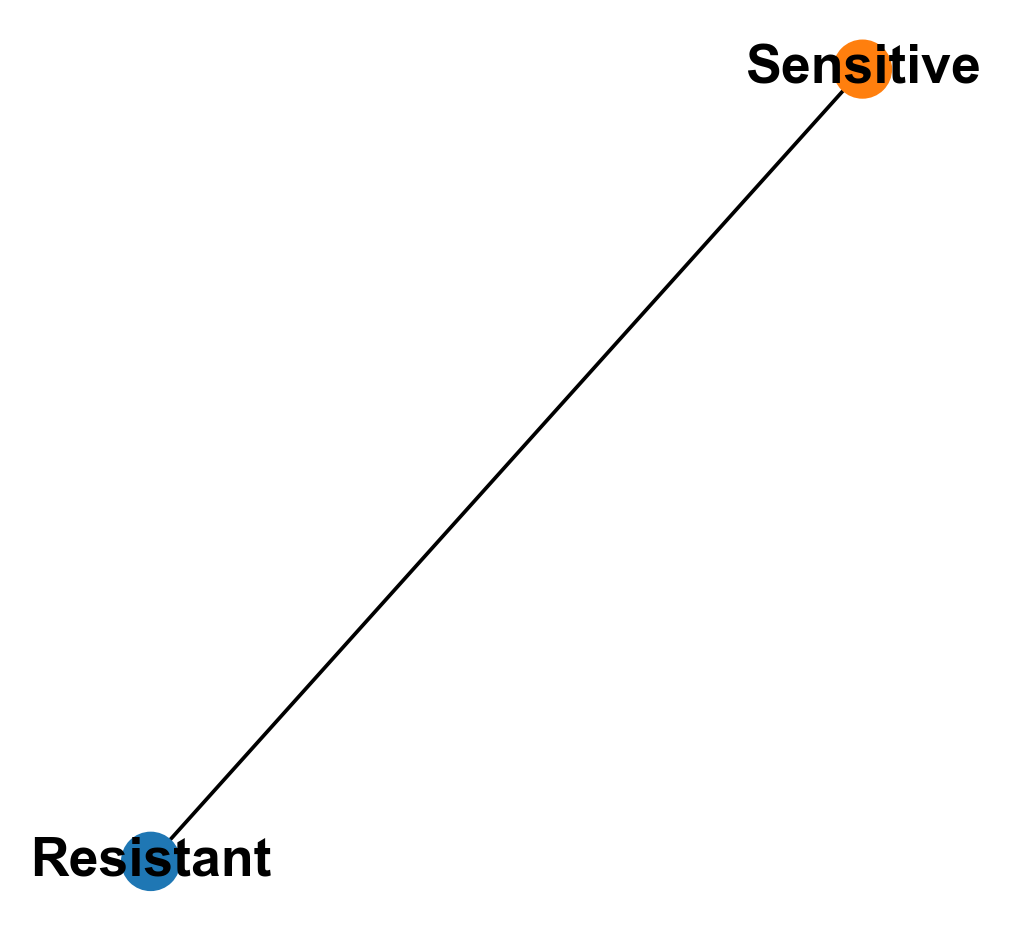

In [22]:
sc.pl.paga(adata, color=['sensitivity'])

Actually annotate the clusters --- note that *Cma1* is a Mast cell marker and only appears in a small fraction of the cells in the progenitor/stem cell cluster 8, see the single-cell resolved plot below.

In [23]:
adata.obs['sensitivity'].cat.categories

Index(['Resistant', 'Sensitive'], dtype='object')

## Recomputing the embedding using PAGA-initialization

The following is just as well possible for a UMAP.

In [24]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:01)


Choose the colors of the clusters a bit more consistently.

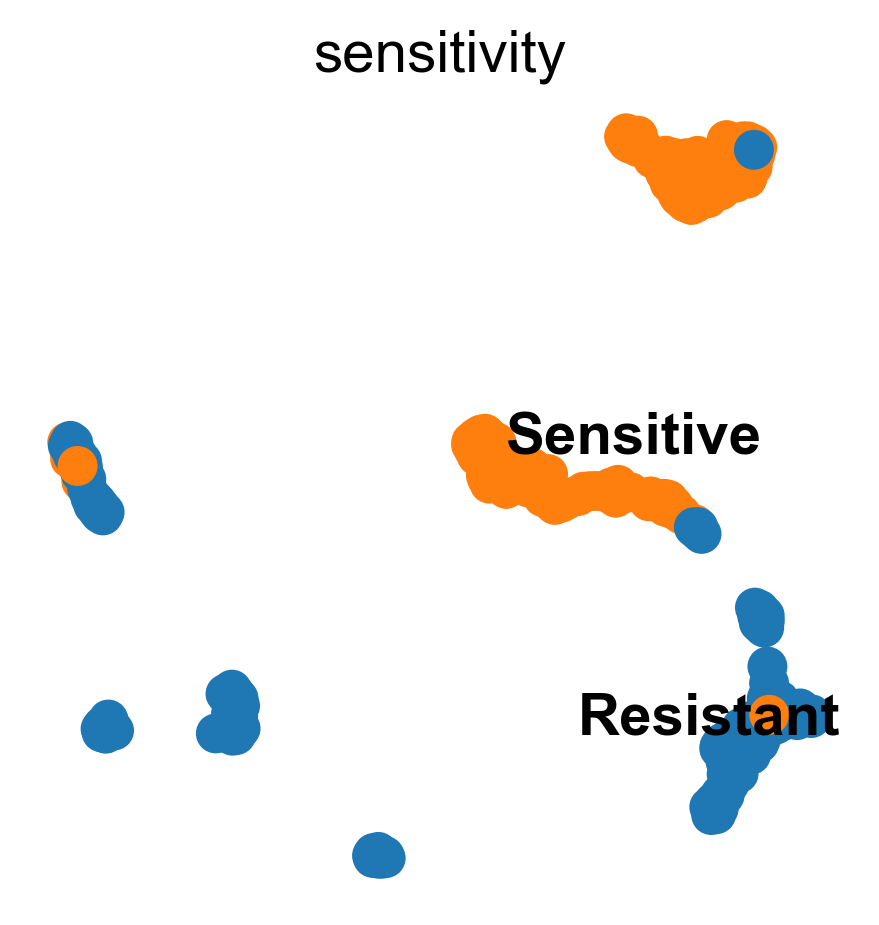

In [25]:
sc.pl.draw_graph(adata, color=['sensitivity'], legend_loc='on data')

And add some white space to some cluster names. The layout shown here differs from the one in the paper, which can be found [here](https://github.com/theislab/paga/blob/f53fcdf4a861b7d3410f8096ffc13a07f1d225c0/blood/paul15/paul15.ipynb). These differences, however, are only cosmetic. We had to change the layout as we moved from a randomized PCA and float32 to float64 precision.

--> added 'pos', the PAGA positions (adata.uns['paga'])


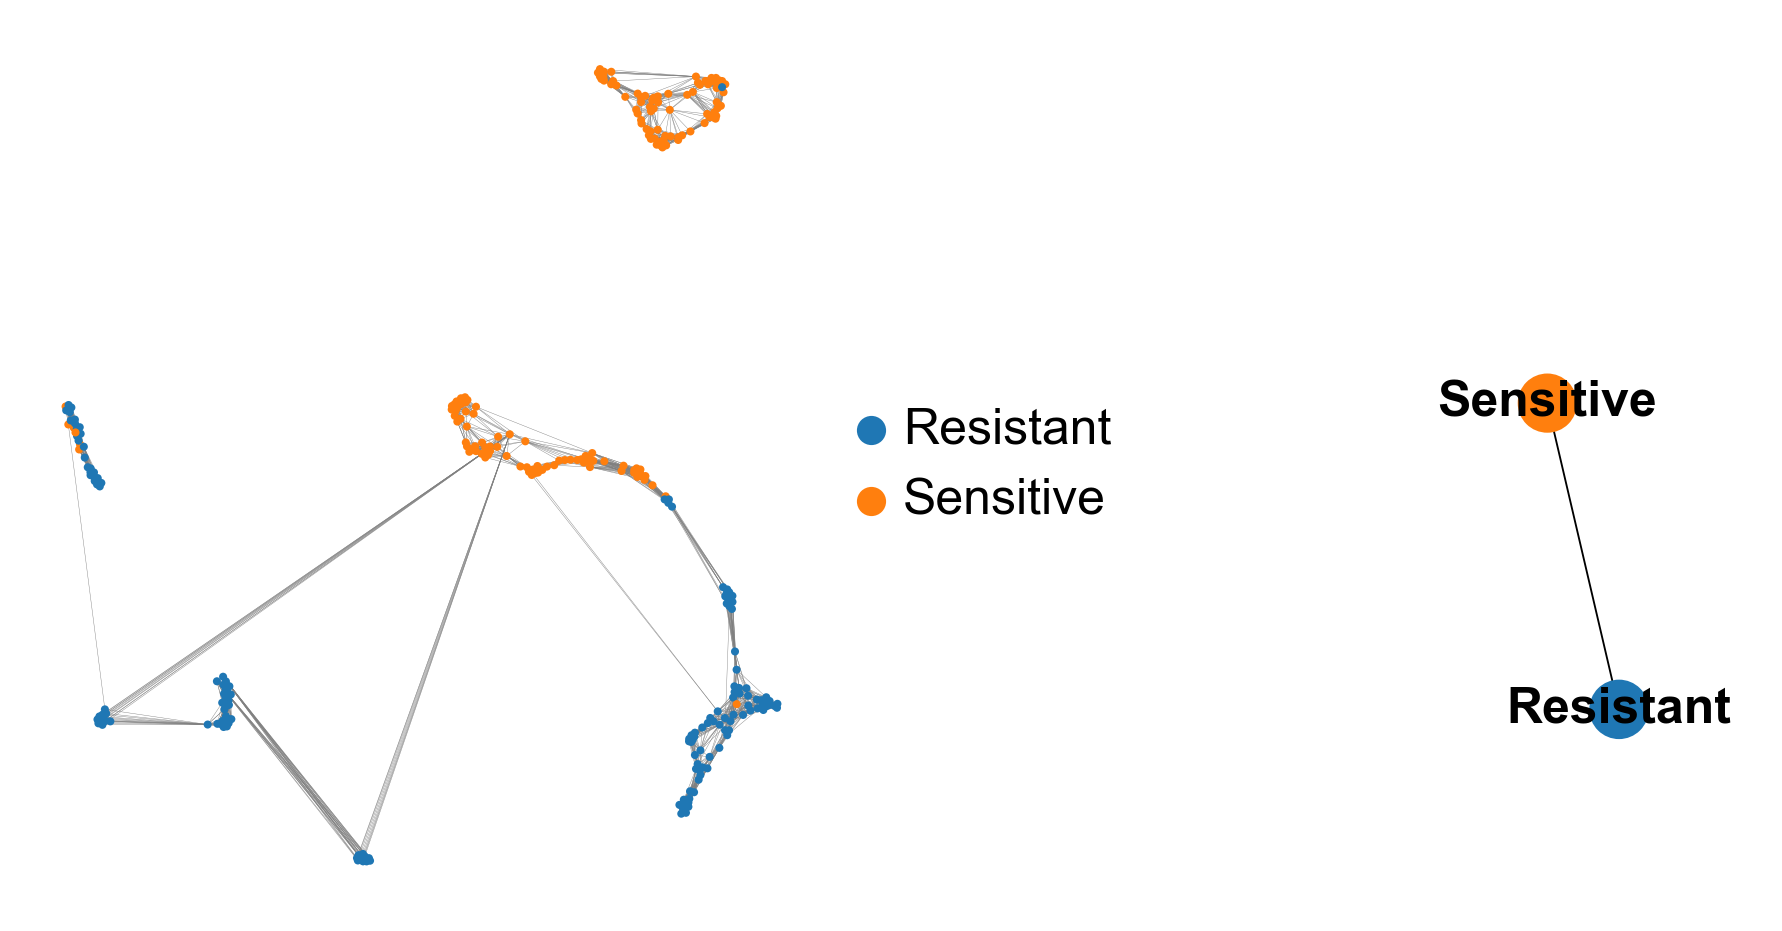

In [26]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=15, edge_width_scale=0.5,legend_loc='right margin',
    legend_fontsize=12, fontsize=12, frameon=False, edges=True)

## Reconstructing gene changes along PAGA paths for a given set of genes

Choose a root cell for diffusion pseudotime.

In [27]:
# Recompute neighbors and diffusion map because there are bugs when using method = umap in GSE117872 
sc.pp.neighbors(adata,n_neighbors=15,method='gauss')
sc.tl.diffmap(adata,n_comps=15)
# Set the root as the parental cell cluster
adata.uns['iroot'] = np.flatnonzero(adata.obs['sensitivity']  == 'Sensitive')[0]
sc.tl.dpt(adata,n_branchings=0)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.996638   0.97766596 0.9596856  0.9462592  0.83187664
     0.76358294 0.6806032  0.66792    0.65314597 0.5952686  0.57180613
     0.5350404  0.52535456 0.51069945]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


Select some of the critical gene names.

Use the full raw data for visualization.

In [28]:
adata_raw = adata
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

D:\Anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:318: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


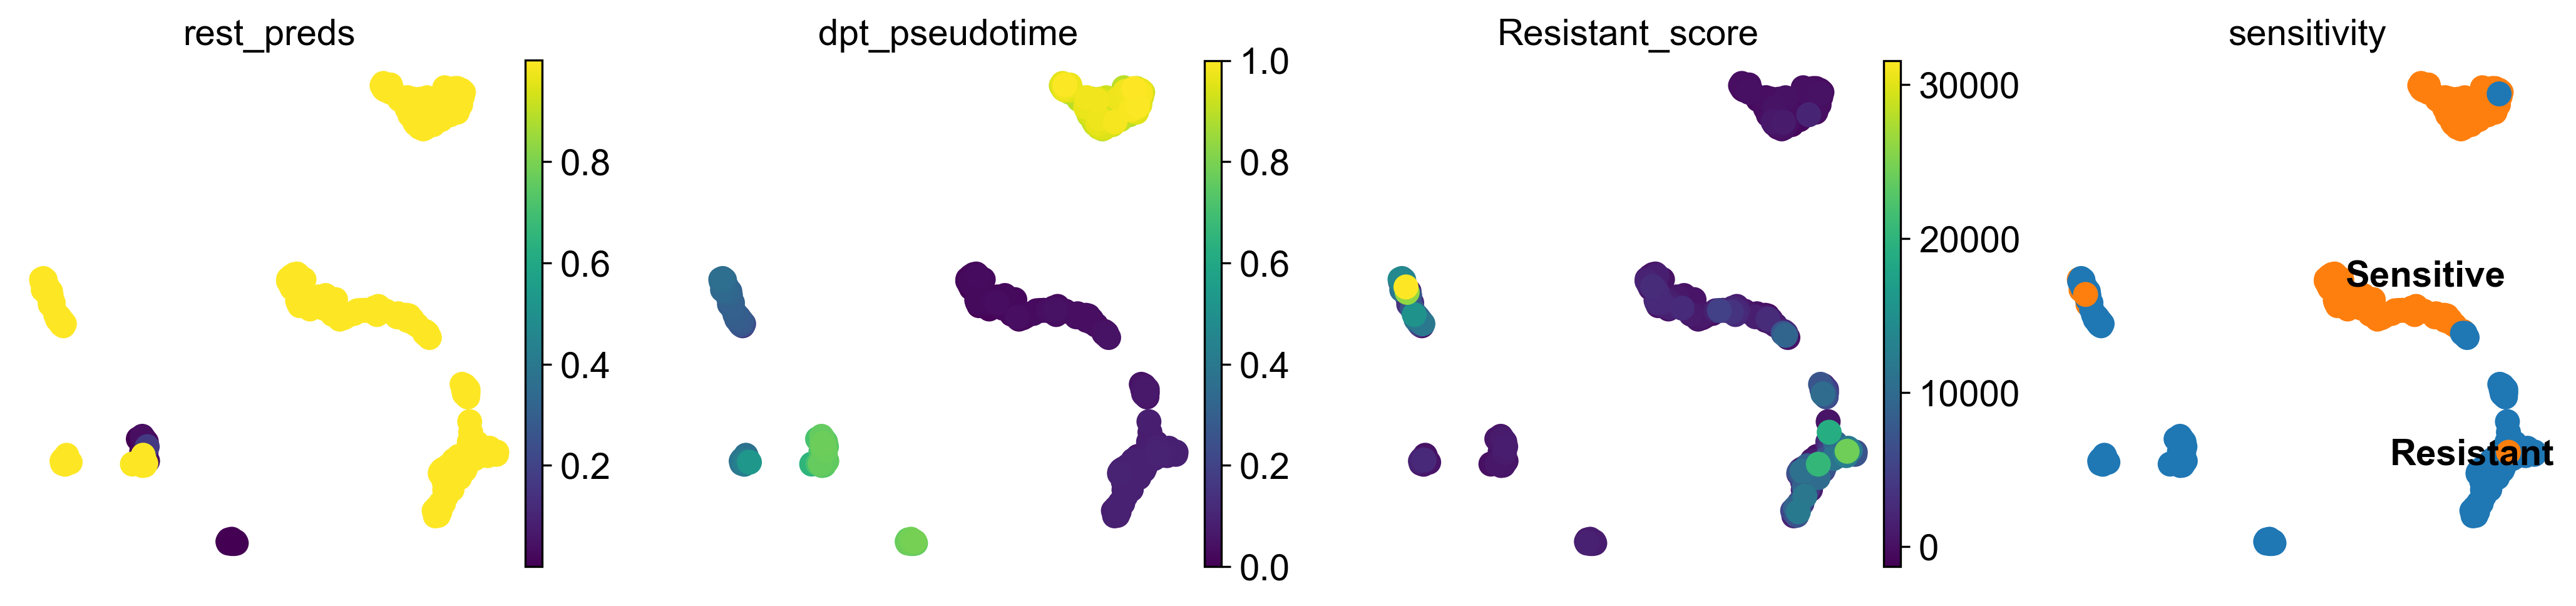

In [29]:
sc.pl.draw_graph(adata, color=['rest_preds', 'dpt_pseudotime','Resistant_score','sensitivity'], legend_loc='on data')

In [30]:
# sc.pl.paga_compare(
#     adata, threshold=0.1,color=['dpt_pseudotime'], title='', right_margin=0.2, size=15, edge_width_scale=0.5,legend_loc='right margin',
#     legend_fontsize=12, fontsize=12, frameon=False,colorbar=False, edges=True, save=False,)

## Regression plot

In [31]:
adata

AnnData object with n_obs × n_vars = 327 × 8054
    obs: 'name_section_1', 'name_section_2', 'name_section_3', 'name_section_4', 'name_section_5', 'sensitive', 'sensitivity', 'Sensitive_score', 'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds', '0_score', '1_score', 'sens_truth', 'leiden_trans', 'leiden_Pret', 'dpt_pseudotime'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Pret', 'Trans', 'diffmap_evals', 'difftrans', 'draw_graph', 'hvg', 'iroot', 'leiden', 'leiden_Pret_colors', 'leiden_colors', 'leiden_origin_colors', 'leiden_sizes', 'leiden_trans_colors', 'leiden_trans_sizes', 'neighbors', 'paga'

In [32]:
from scipy.stats import spearmanr,pearsonr,kendalltau

dpt = np.array(adata.obs["dpt_pseudotime"])
sens = np.array(adata.obs["rest_preds"])
    
corr,pval = pearsonr(dpt,sens)

print(corr)

-0.3162272976954069


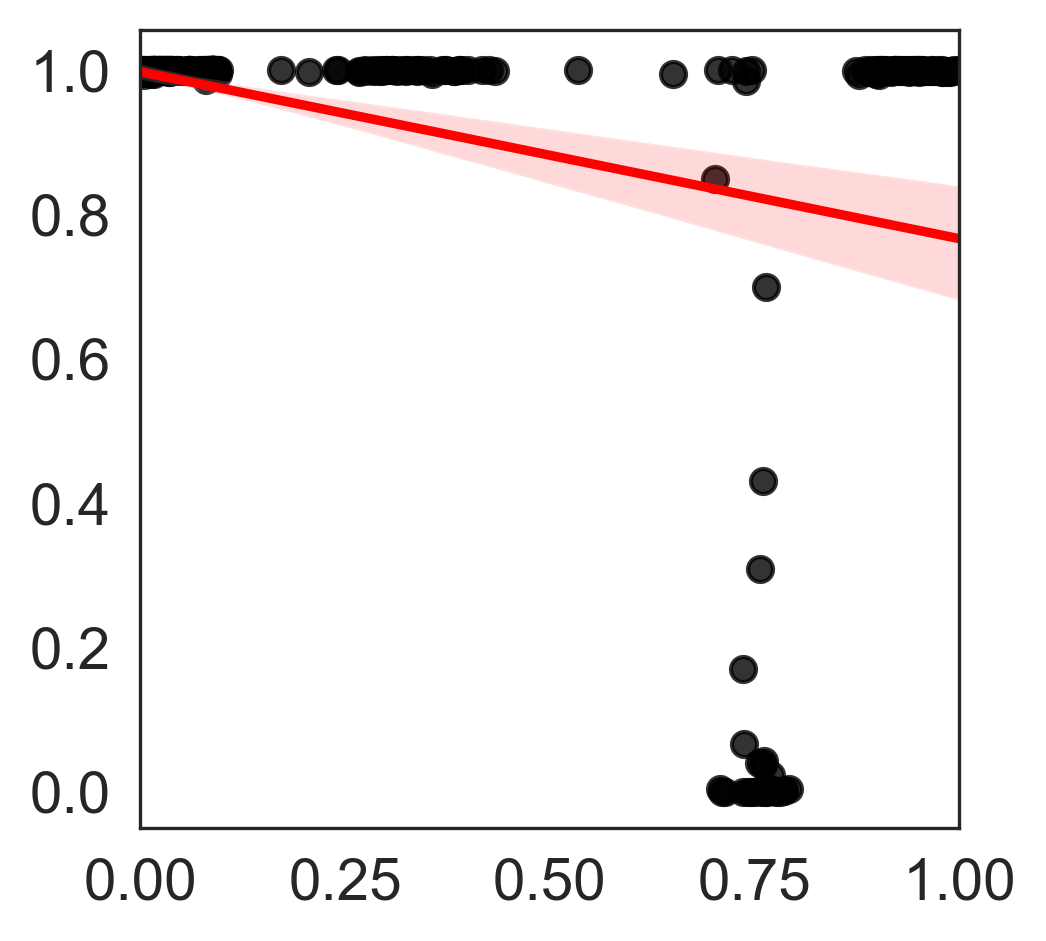

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
ax = sns.regplot(x=dpt, y=sens,line_kws={"color":'red'}, scatter_kws ={"color":'black'})
plt.savefig(data_path+"regplot.pdf")

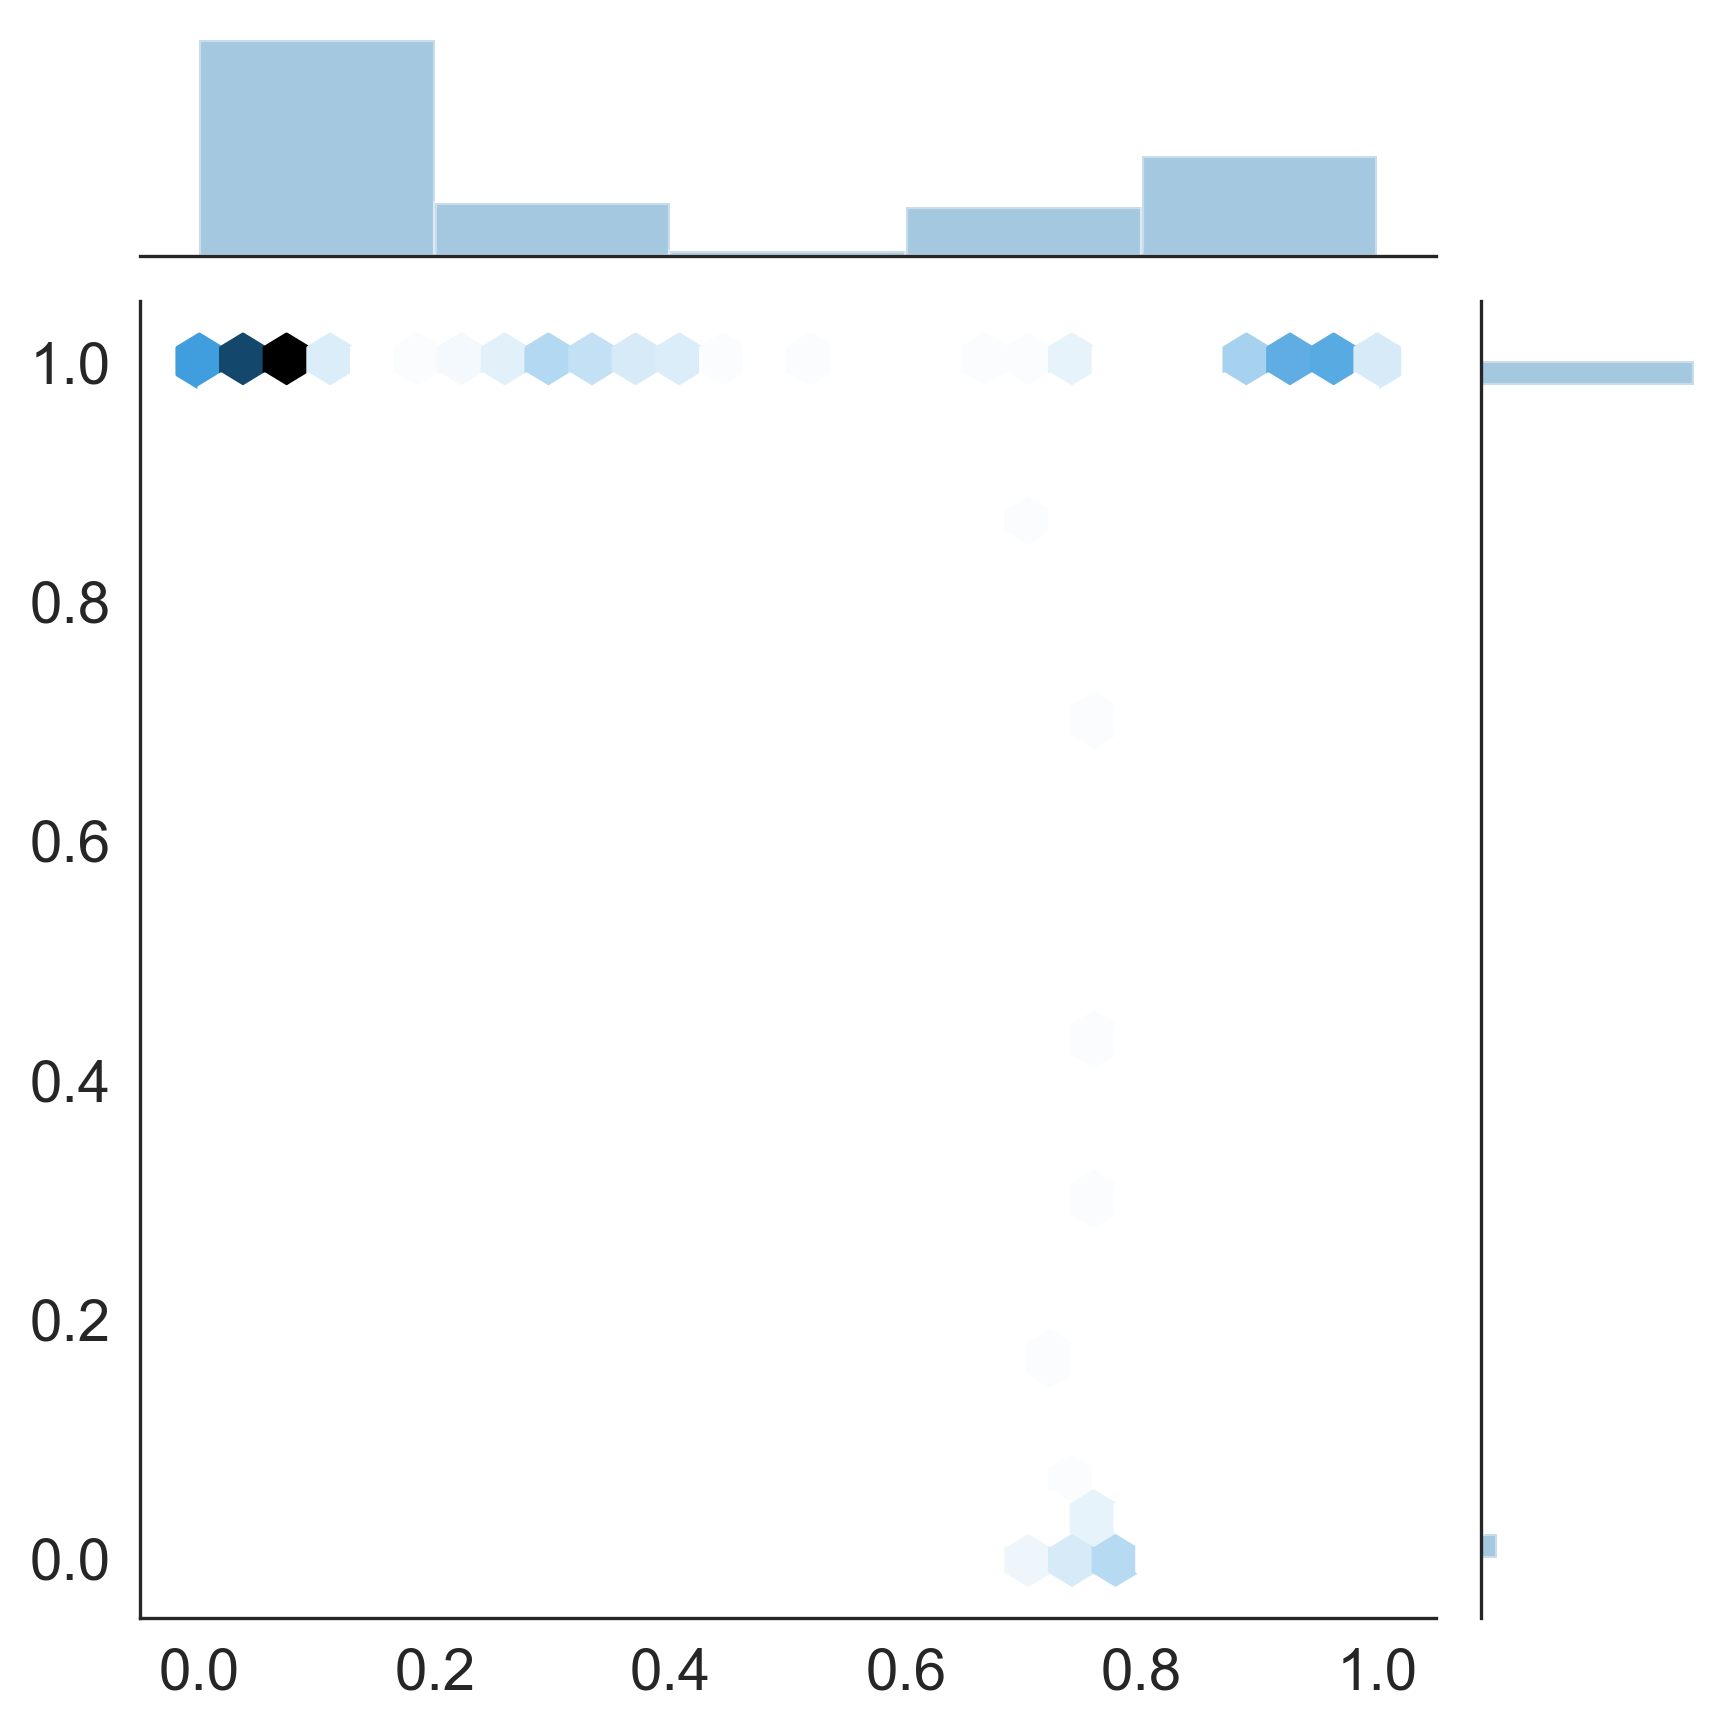

In [34]:
from scipy import stats
def r2(x, y):
    return stats.spearmanr(x, y)[1] 
# sns.jointplot(dpt, sens, kind="reg", line_kws={"color":'red'},stat_func=r2)
sns.jointplot(dpt, sens, kind="hex")


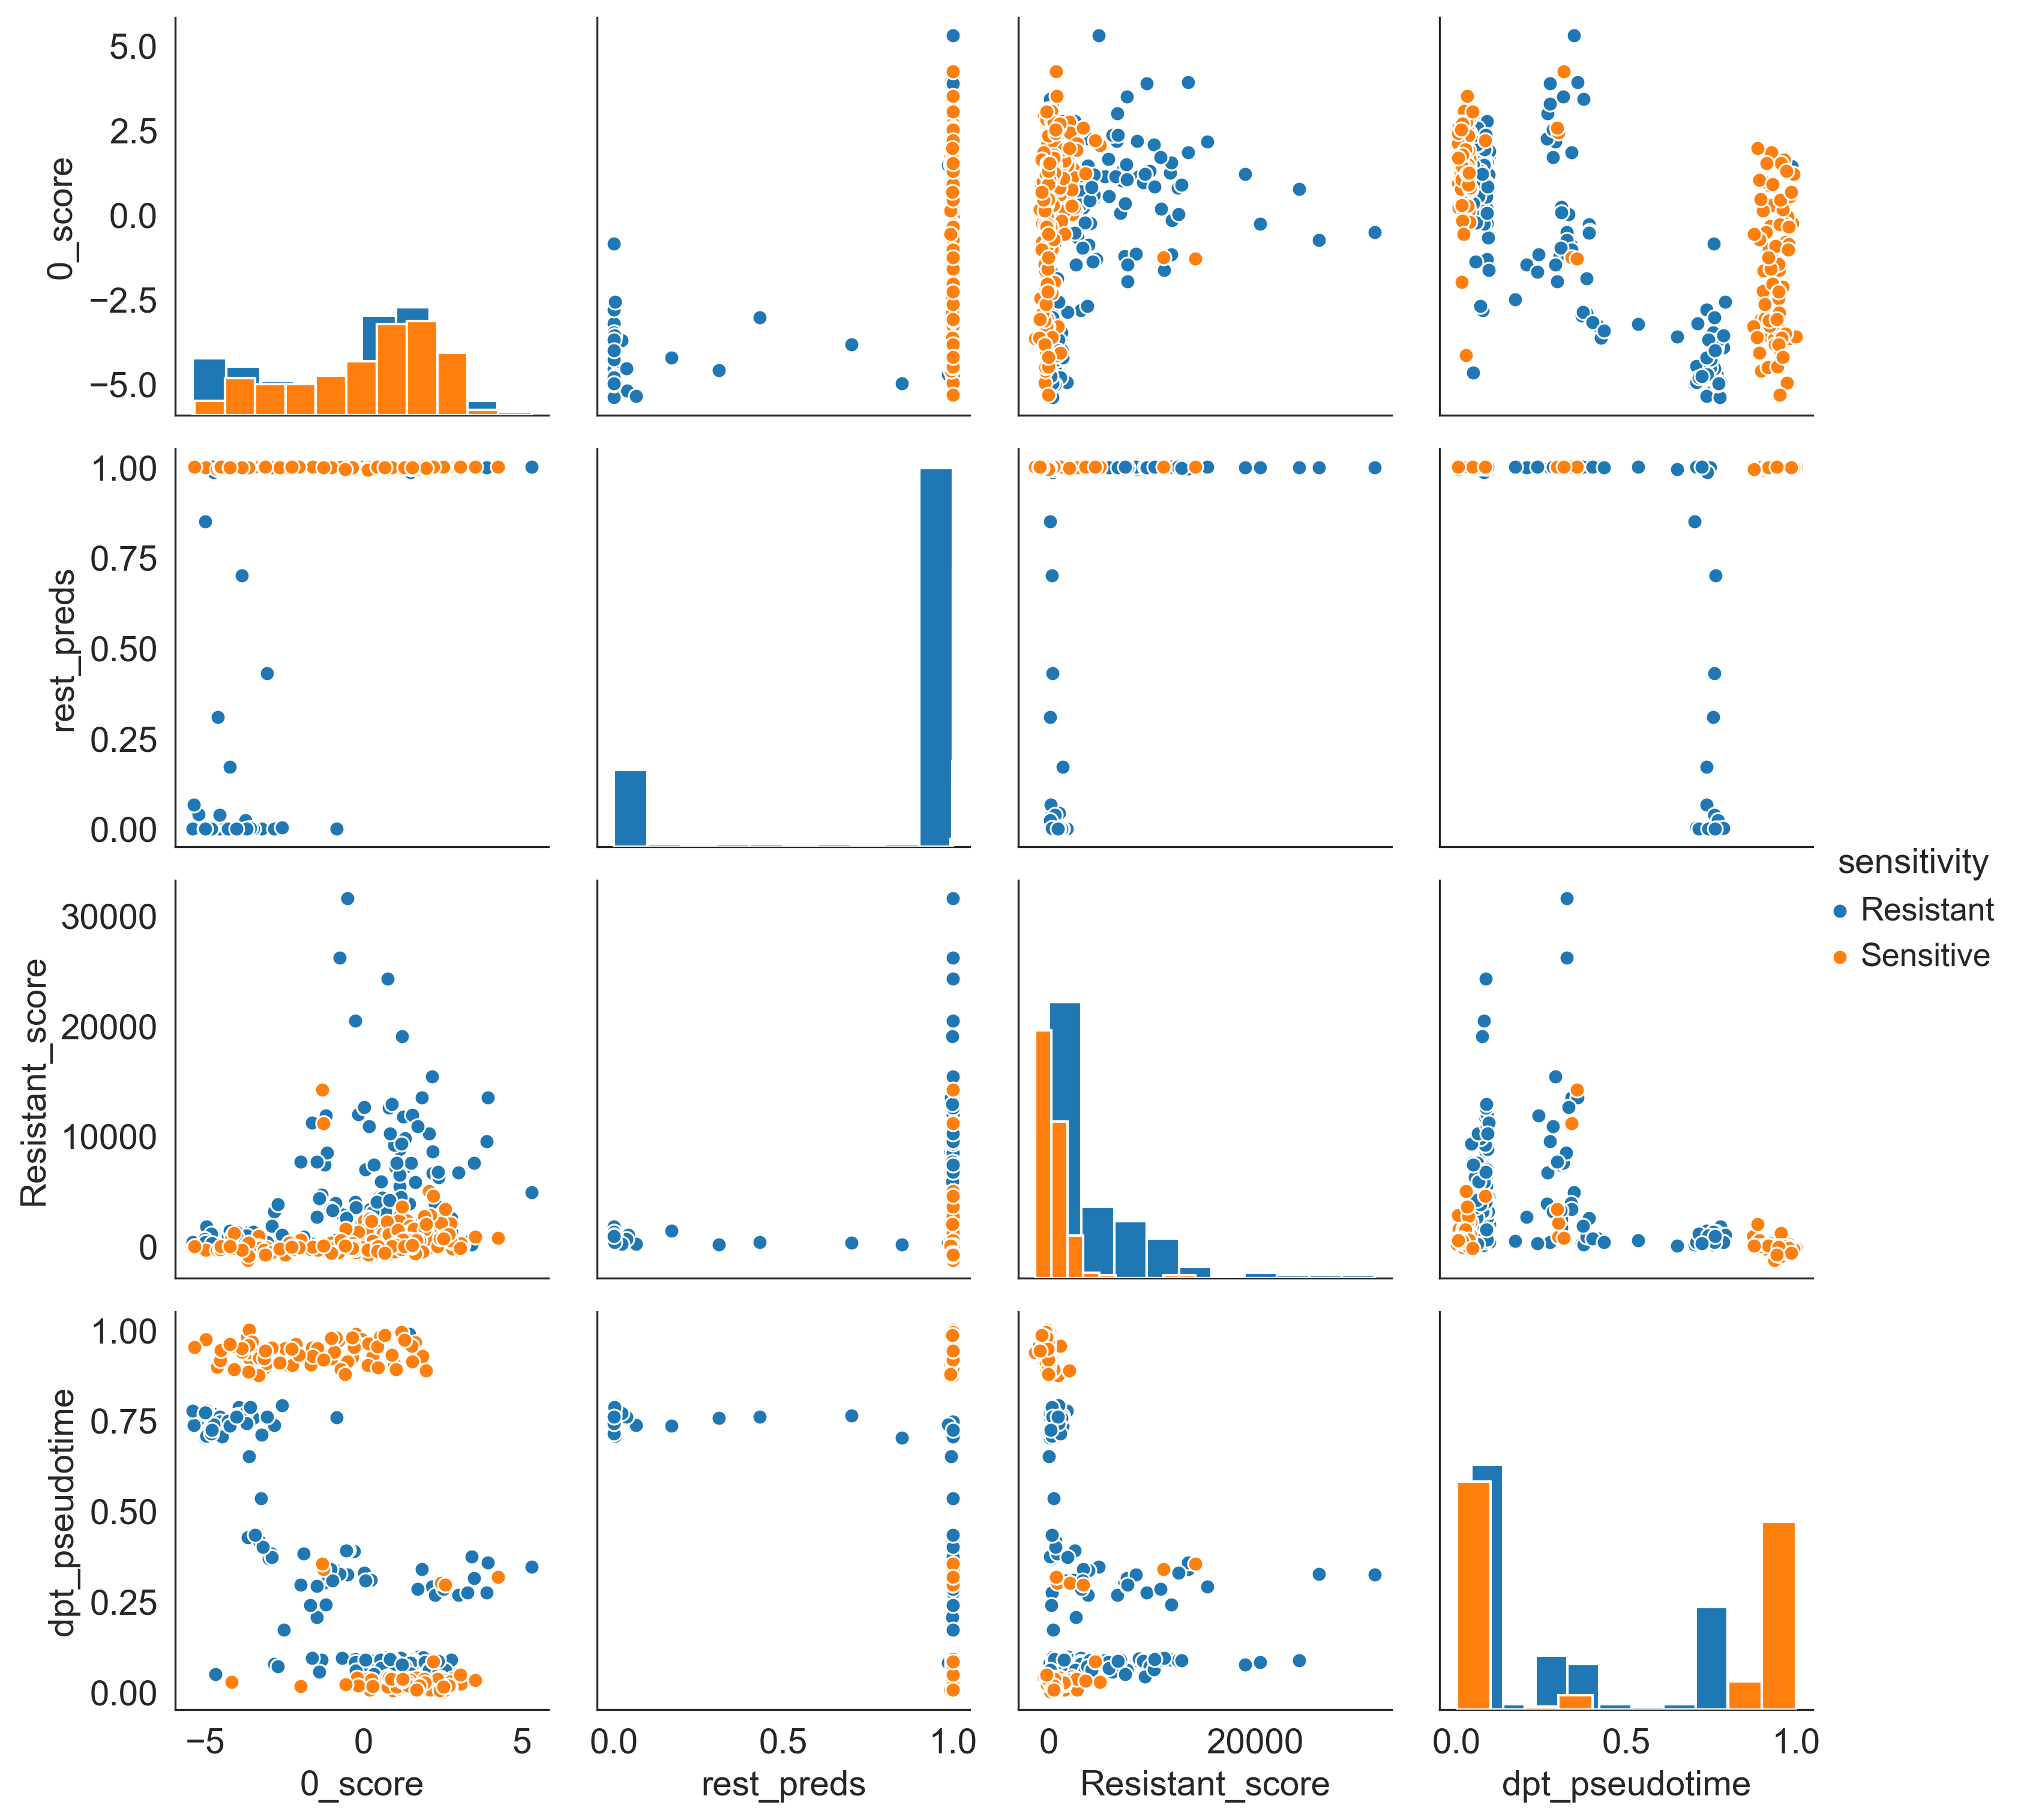

In [35]:
sns.pairplot(adata.obs,x_vars=['0_score','rest_preds','Resistant_score','dpt_pseudotime']\
             , y_vars=['0_score','rest_preds','Resistant_score','dpt_pseudotime'],\
             hue='sensitivity', diag_kind="hist",height=2.5)
plt.savefig(data_path+"joinplot.pdf")

In [36]:
corr = adata.obs.loc[:,['dpt_pseudotime','rest_preds','0_score','Resistant_score']].corr()

In [37]:
corr.iloc[0,0]=0

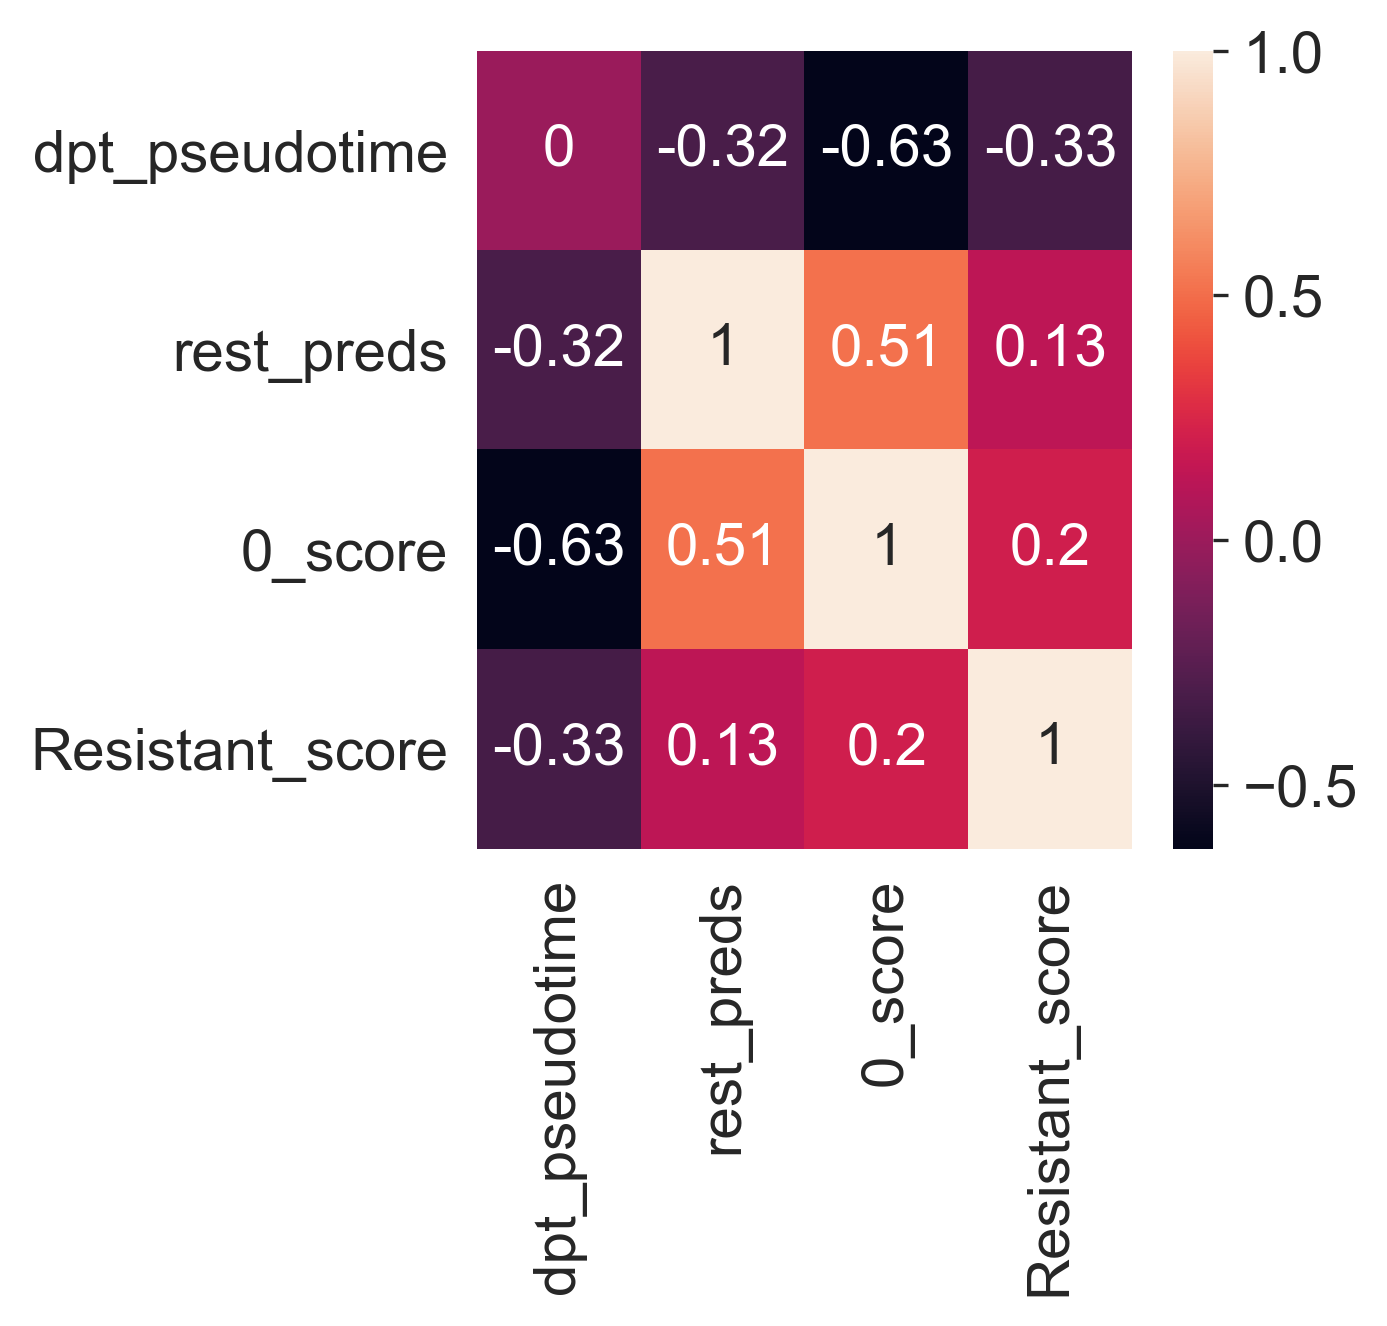

In [38]:
ax=sns.heatmap(corr,annot=True)
plt.savefig(data_path+"corheatmap.pdf")